<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/Nico/DLY0100_Entrega_1_nicogaby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluaci√≥n 1 - Entrenando redes feedforward

**Autores:**

+ Nicolas Navarro
+ Gabriela Sandoval

**Correos Electr√≥nicos:**

+ ni.navarroa@duoc.cl
+ g.sandoval@duoc.cl

**Fecha de Creaci√≥n:** Abril de 2025  
**Versi√≥n:** 1.0  

---

## Descripci√≥n

Este notebook contiene el desarrollo de la evaluaci√≥n 1 de la asignatura de Deep Learning de la carrera de Ingenier√≠a en Inform√°tica de DuocUC sede Concepci√≥n.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [89]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-17 06:44:19--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‚Äòtrain-images-idx3-ubyte.gz‚Äô

train-images-idx3-u 100%[===================>]   9.45M  6.41MB/s    in 1.5s    

2025-04-17 06:44:21 (6.41 MB/s) - ‚Äòtrain-images-idx3-ubyte.gz‚Äô saved [9912422/9912422]

--2025-04-17 06:44:21--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (2

In [90]:
!ls -lh

total 55M
-rw-r--r-- 1 root root 2.2M Apr 17 05:01 hist_sgd_relu.keras
-rw-r--r-- 1 root root 2.3M Apr 17 06:22 modelo_final.keras
-rw-r--r-- 1 root root 6.6M Apr 17 06:41 modelo_mas_equilibrado.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:49 red_adam_batch256.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:47 red_adam_batch64.keras
-rw-r--r-- 1 root root 2.2M Apr 17 06:15 red_adam_dropout.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:45 red_adam_elu.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:59 red_adam_epoca.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:41 red_adam_relu.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:15 red_sgd_batch256.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:14 red_sgd_batch64.keras
-rw-r--r-- 1 root root 6.7M Apr 17 06:02 red_sgd_capa4.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:38 red_sgd_dropout.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:12 red_sgd_elu.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:32 red_sgd_epoca.keras
-rw-r--r-- 1 root root 2.2M Apr 17 05:10 red_sgd_rel

In [91]:
import gzip
import pandas as pd
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
###
from keras.utils import to_categorical

from time import time

#Introduccion

Introducci√≥n: Descripci√≥n del problema y objetivo del modelo.


En este notebook se trabajar√° con el dataset MNIST, que contiene im√°genes de d√≠gitos escritos a mano (0‚Äì9). Como primer paso, es fundamental preprocesar los datos antes de entrenar una red neuronal.

Primero, cada imagen tiene un tama√±o original de 28x28 p√≠xeles, lo que significa que est√° compuesta por 784 valores (28√ó28). Para poder trabajar con estas im√°genes en una red neuronal, debemos aplanarlas, es decir, se convierten en un vector de tama√±o 784 en lugar de una matriz 2D.

Luego, las im√°genes se normalizan, es decir, se dividen sus valores por 255 para que queden entre 0 y 1. Esto mejora la eficiencia del entrenamiento, ya que evita trabajar con n√∫meros muy grandes que podr√≠an afectar negativamente el c√°lculo de los gradientes durante el entrenamiento.

Por otra parte, las etiquetas que indican el n√∫mero que representa cada imagen tambi√©n deben ser procesadas. En este caso utilizaremos el one-hot encoding, lo que convierte, por ejemplo, un "3" en el vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esto es necesario porque la red no puede trabajar directamente con n√∫meros enteros como clases, ya que no entiende que son categor√≠as y no cantidades.

El dataset incluye 60.000 im√°genes para entrenamiento y 10.000 para prueba, lo que permite entrenar el modelo con muchos ejemplos y evaluarlo con datos nuevos para medir su capacidad de generalizar.

Finalmente, este preprocesamiento adapta correctamente las im√°genes y etiquetas al formato que requiere la red neuronal para aprender de manera efectiva.

# Carga de im√°genes

In [92]:
# Funci√≥n para cargar im√°genes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Funci√≥n para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificaci√≥n

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


# Muestra im√°genes

In [93]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

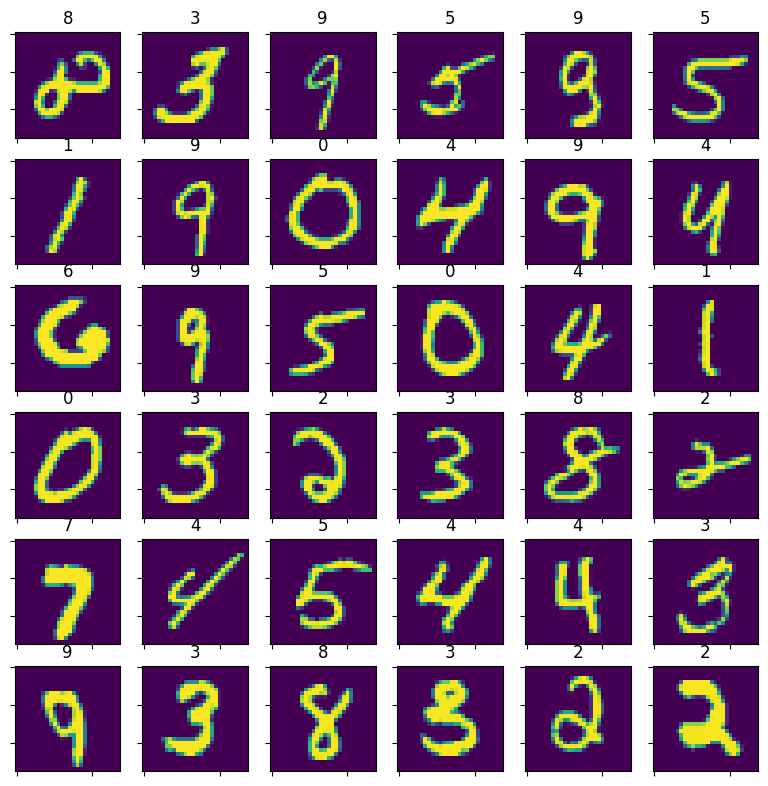

In [94]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [95]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de im√°genes del n√∫mero {i}: {numimagen[i]}")

Cantidad de im√°genes del n√∫mero 0: 5923.0
Cantidad de im√°genes del n√∫mero 1: 6742.0
Cantidad de im√°genes del n√∫mero 2: 5958.0
Cantidad de im√°genes del n√∫mero 3: 6131.0
Cantidad de im√°genes del n√∫mero 4: 5842.0
Cantidad de im√°genes del n√∫mero 5: 5421.0
Cantidad de im√°genes del n√∫mero 6: 5918.0
Cantidad de im√°genes del n√∫mero 7: 6265.0
Cantidad de im√°genes del n√∫mero 8: 5851.0
Cantidad de im√°genes del n√∫mero 9: 5949.0


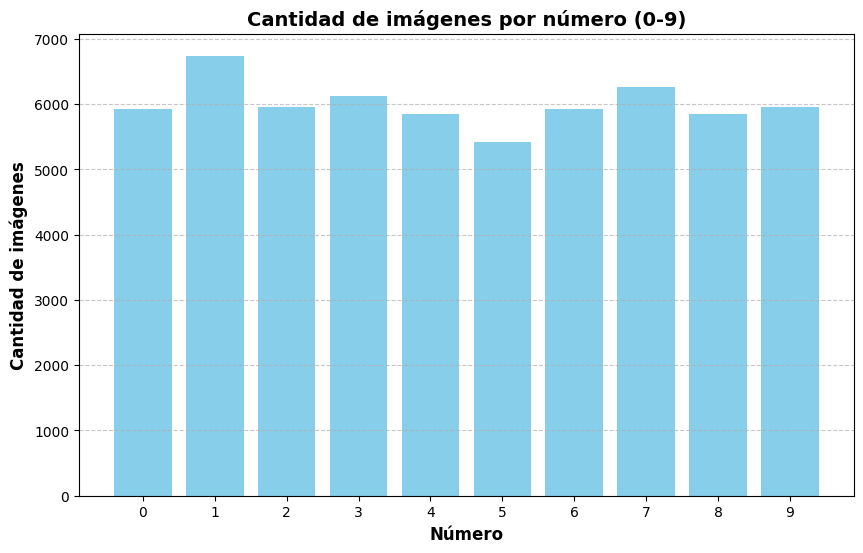

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(numimagen)), numimagen, color='skyblue')
plt.title('Cantidad de im√°genes por n√∫mero (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('N√∫mero', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de im√°genes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

Las im√°genes del dataset est√°n relativamente balanceadas entre las 10 clases. La clase con m√°s ejemplos es el n√∫mero 1 (6742 im√°genes) y la que menos tiene es el n√∫mero 5 (5421 im√°genes). Aunque hay peque√±as diferencias, la distribuci√≥n es lo suficientemente equilibrada como para entrenar modelos sin riesgo significativo de sesgo hacia una clase espec√≠fica.

# Definici√≥n del modelo base

1. explicacion m,n,c
2. explicacion seed
3. explicacion cantidad de capas ocupltas y su valor
4. cantidad de epocas
5. explicacion de funcion loss (si categorical_crossentropy no binary_corss)
5. eleccion de optimizadores (sgd y adam)
6. eleccion de avticadores con sus ventajas (relu y elu)
6. con activacion (relu)
7. vs con avticacion (elu)
8. explicaion de comparacion de fun activacion
9. cambio bachsize y explicacion
10. cambio epocas y explicacion
11. drop out
12. comparacion mejor modelo sin regulacion y con


#Entrenamiento y ajuste de hiperpar√°metros

## M, N y C

In [97]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


M: Representa la cantidad de imagenes en el conjunto de entrenamiento: 60,000 im√°genes de d√≠gitos escritos a mano.

N: Cada imagen tiene 784 p√≠xeles. Esto significa que las imagenes del conjunto de datos son de 28 x 28 p√≠xeles aplanadas en un vector de 784 p√≠xeles.

C: Es la cantidad de clases posibles (d√≠gitos escritos a mano del 0 al 9). Por eso, cada etiqueta en y_train est√° codificada en one-hot, usando un vector de 10 posiciones con un 1 en la clase correspondiente y 0 en las dem√°s.

## Seeds

In [98]:
np.random.seed(29)
tf.random.set_seed(29)

Se fijaron semillas para asegurar que los resultados sean reproducibles. Es decir, que si se vuelve a ejecutar el mismo modelo, con los mismos datos y esta semilla, se obtendr√°n los mismos resultados.

## Capas ocultas y neuronas

In [99]:
h1 = 512
h2 = 256
h3 = 128

En el modelo de base utilizar√°n tres capas ocultas con 512, 256 y 128 neuronas respectivamente. Esta estructura descendente permite una reducci√≥n progresiva de la dimensionalidad, capturando patrones generales en las primeras capas y refinando caracter√≠sticas m√°s espec√≠ficas en las capas posteriores.

h1 = 512 Primera capa oculta tendr√° 512 neuronas. Recibe los 784 pixeles de cada imagen de entrada.

h2 = 256 Segunda capa oculta tendr√° 256 neuronas.

h3 = 128 Tercera capa oculta tendr√° 128 neuronas.





## √âpocas y batch size inicial

Como base, se utilizar√°n 10 √©pocas, ya que es una cantidad adecuada para que el modelo aprenda los patrones principales del dataset y se pueda evaluar si est√° aprendiendo correctamente sin llegar a sobreentrenarse. Esto permite un buen equilibrio entre la calidad del aprendizaje y el tiempo requerido para el entrenamiento. Adem√°s, se usar√° un batch size de 32 porque ofrece un buen rendimiento en cuanto a estabilidad y velocidad durante el proceso, sin exigir demasiados recursos del sistema.

## Funci√≥n de perdida

Se utilizar√° categorical_crossentropy como funci√≥n de p√©rdida debido a que el problema es de clasificaci√≥n multiclase, en el que las etiquetas est√°n representadas en formato one-hot encoding. En este formato, cada clase (d√≠gito del 0 al 9) se codifica como un vector en el que solo una posici√≥n est√° activa, correspondiente a la clase correcta.

La funci√≥n categorical_crossentropy mide la diferencia entre las probabilidades predichas por el modelo y las verdaderas distribuciones de clases. Su objetivo es minimizar la diferencia entre las predicciones del modelo y las clases reales, penalizando las predicciones incorrectas. Al utilizar esta funci√≥n de p√©rdida, se busca que el modelo asigne la mayor probabilidad a la clase correcta, optimizando el aprendizaje en problemas de clasificaci√≥n multiclase.               

üß† ¬øQu√© hace categorical_crossentropy?
Compara la distribuci√≥n real (las etiquetas reales, one-hot) con la distribuci√≥n predicha por la red (salida del softmax).

Calcula cu√°nto se equivoc√≥ el modelo en su predicci√≥n.

üìä ¬øPor qu√© no usar binary_crossentropy?
Porque binary_crossentropy es solo para clasificaci√≥n binaria (2 clases: 0 o 1).
Aunque podr√≠as usarlo en un problema multiclase si tratas cada clase como independiente (modo "one-vs-all"), no es lo √≥ptimo ni lo esperado en MNIST.

## Explicacion de acticador softmax en capa de salida y pq no puede ser otro

üéØ ¬øQu√© hace softmax?
Convierte el vector de salida de la √∫ltima capa (que puede tener cualquier valor real) en un vector de probabilidades, donde:

Cada valor est√° entre 0 y 1

La suma de todas las salidas da 1

La clase con mayor probabilidad es la que el modelo predice

üìå ¬øPor qu√© softmax es la √∫nica opci√≥n v√°lida aqu√≠?
Porque est√°s resolviendo un problema de clasificaci√≥n multiclase con una √∫nica clase por ejemplo (es decir, un d√≠gito del 0 al 9 por imagen).

El modelo debe elegir una sola clase

softmax convierte las salidas en probabilidades mutuamente excluyentes

Y adem√°s, la funci√≥n de p√©rdida categorical_crossentropy espera que la salida sea una distribuci√≥n de probabilidad, lo que softmax garantiza.

‚úÖ Conclusi√≥n
La activaci√≥n softmax en la capa de salida es la √∫nica opci√≥n correcta para clasificaci√≥n multiclase con one-hot encoding porque convierte las salidas en probabilidades comparables y sumables, permitiendo usar funciones como categorical_crossentropy y elegir la clase m√°s probable.

##Explicacion de optimizadores a ocupar

SGD

‚úÖ Ventajas:
Simple, f√°cil de implementar.

Buena generalizaci√≥n si se configura bien.

‚ö†Ô∏è Desventajas:
Puede ser lento en converger.

Puede oscilar mucho en terrenos con muchos m√≠nimos o curvas irregulares.

Requiere ajustar muy bien el learning rate.

üìå Ideal para:
Casos simples o si quieres control total del aprendizaje.

A veces se mejora agregando momentum para suavizar los saltos.

Adam

‚úÖ Ventajas:
Aprende m√°s r√°pido en muchos casos.

Funciona bien con poco ajuste (learning rate por defecto: 0.001).

Se adapta autom√°ticamente ‚Üí √∫til en datasets ruidosos o variables.

‚ö†Ô∏è Desventajas:
A veces no generaliza tan bien como SGD.

M√°s complejo computacionalmente (pero en la pr√°ctica, no es un problema con hardware moderno).

üìå Ideal para:
Cuando necesitas resultados r√°pidos y estables.

Problemas m√°s complejos o cuando no quieres afinar mucho a mano.


Optimizador	Ventajas	Desventajas	Cu√°ndo usar
SGD	Simple, buena generalizaci√≥n	Lento, necesita tuning	Cuando tienes tiempo y control
Adam	R√°pido, adaptable, f√°cil de usar	Puede sobreajustar en algunos casos	Para empezar, y problemas complejos

 ¬øCu√°l usar en MNIST?
Adam: funciona muy bien, r√°pido y eficaz.

SGD: √∫til si quieres experimentar o evitar sobreajuste.

‚úÖ En pr√°ctica: muchos modelos actuales empiezan con Adam por su eficiencia.

##ExpLICACION DE METRICAS PARA EVALUAR LOS MODELOS

¬°S√∫per buena observaci√≥n! Es verdad que precision, recall y F1-score se definieron originalmente para clasificaci√≥n binaria, pero s√≠ se extienden perfectamente a problemas multiclase como MNIST.

‚úÖ ¬øSirven para clasificaci√≥n multiclase?
S√≠, 100% sirven, y son muy comunes en problemas multiclase como MNIST.

üîç ¬øC√≥mo se adaptan?
En un problema con varias clases (como d√≠gitos 0‚Äì9), se calcula una m√©trica por clase, trat√°ndola como la clase positiva y al resto como negativas.

Por ejemplo:

Para calcular la precisi√≥n del d√≠gito 3, se ve cu√°ntas veces el modelo predijo 3 correctamente vs cu√°ntas veces predijo 3 en total (aunque fueran errores).

Esto se hace para cada clase del 0 al 9.

üìå En resumen:

‚ùì Pregunta	‚úÖ Respuesta
¬øSon estas m√©tricas solo para binario?	No, tambi√©n sirven para multiclase
¬øSe pueden usar con MNIST?	S√≠, y es muy recomendable
¬øTe dan valor agregado frente a accuracy?	S√≠, muestran errores por clase

# Experimento 1: Optimizador SGD

## Activadores (Relu y Elu)

üß† ¬øQu√© hace?
Si el valor de entrada es positivo, lo deja igual.

Si es negativo, lo convierte en 0.

‚úÖ Ventajas:
Muy simple y eficiente.

Evita el problema del desvanecimiento del gradiente (que pasaba con activaciones como sigmoid o tanh).

Permite que el modelo aprenda r√°pido.

‚ö†Ô∏è Problema:
Algunas neuronas pueden "morir" (quedan siempre en 0 si reciben valores negativos constantemente). Esto puede hacer que ciertas neuronas dejen de aprender, a eso se le llama "neurona muerta".

üß† ¬øQu√© hace?
Igual que ReLU para los valores positivos.

Pero en lugar de dar 0 a los negativos, les asigna un valor negativo suave (curvado), lo cual:

Permite que la red siga aprendiendo aunque reciba valores negativos.

Reduce el riesgo de neuronas muertas.

‚úÖ Ventajas:
M√°s robusta para entrenamientos largos o redes m√°s profundas.

Mejora la convergencia en algunos casos.

‚ö†Ô∏è Desventaja:
M√°s costosa computacionalmente que ReLU (usa exponenciales).

Si no est√° bien ajustado, puede introducir ruido en algunas situaciones

### Relu

In [100]:
red_sgd_relu = keras.Sequential(name="Red_sgd_relu")
red_sgd_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_sgd_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_sgd_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_sgd_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_sgd_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)

start_time = time()
hist_sgd_relu = red_sgd_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_sgd_relu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.7467 - loss: 0.9539 - precision: 0.9132 - recall: 0.5125 - val_accuracy: 0.9230 - val_loss: 0.2675 - val_precision: 0.9457 - val_recall: 0.9057
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 6ms/step - accuracy: 0.9262 - loss: 0.2541 - precision: 0.9473 - recall: 0.9083 - val_accuracy: 0.9424 - val_loss: 0.1974 - val_precision: 0.9569 - val_recall: 0.9300
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 6ms/step - accuracy: 0.9452 - loss: 0.1902 - precision: 0.9588 - recall: 0.9323 - val_accuracy: 0.9521 - val_loss: 0.1610 - val_precision: 0.9626 - val_recall: 0.9433
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.9557 - loss: 0.1524 - precision: 0.9659 - recall: 0.9465 - val_accuracy: 0.9575 - val_loss: 0.1388 - val_precision: 0.9661 - val_rec

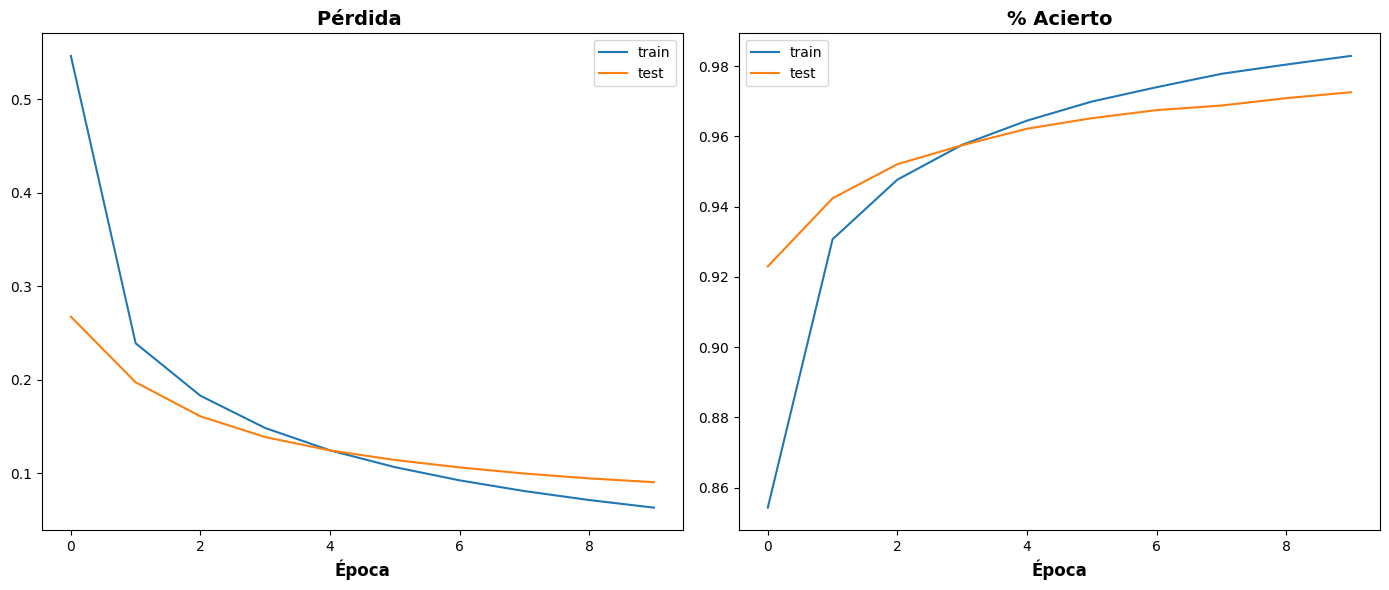

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_relu.history['loss'], label="train")
axs[0].plot(hist_sgd_relu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_relu.history['accuracy'], label="train")
axs[1].plot(hist_sgd_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


*COMENTARIO

### Elu

In [102]:
red_sgd_elu = keras.Sequential(name="red_sgd_elu")
red_sgd_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_elu.add(keras.layers.Dense(h1, activation='elu',name='primera_capa'))
red_sgd_elu.add(keras.layers.Dense(h2, activation='elu',name='segunda_capa'))
red_sgd_elu.add(keras.layers.Dense(h3, activation='elu',name='tercera_capa'))
red_sgd_elu.add(keras.layers.Dense(C, activation='softmax', name='capa_salida'))

red_sgd_elu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_sgd_elu = red_sgd_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_elu.save("red_sgd_elu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.8146 - loss: 0.6992 - precision: 0.9356 - recall: 0.6539 - val_accuracy: 0.9191 - val_loss: 0.2850 - val_precision: 0.9402 - val_recall: 0.9011
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9201 - loss: 0.2776 - precision: 0.9399 - recall: 0.9030 - val_accuracy: 0.9317 - val_loss: 0.2383 - val_precision: 0.9468 - val_recall: 0.9191
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 7ms/step - accuracy: 0.9326 - loss: 0.2305 - precision: 0.9487 - recall: 0.9204 - val_accuracy: 0.9407 - val_loss: 0.2023 - val_precision: 0.9534 - val_recall: 0.9298
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9439 - loss: 0.1951 - precision: 0.9564 - recall: 0.9332 - val_accuracy: 0.9482 - val_loss: 0.1761 - val_precision: 0.9589 - val_rec

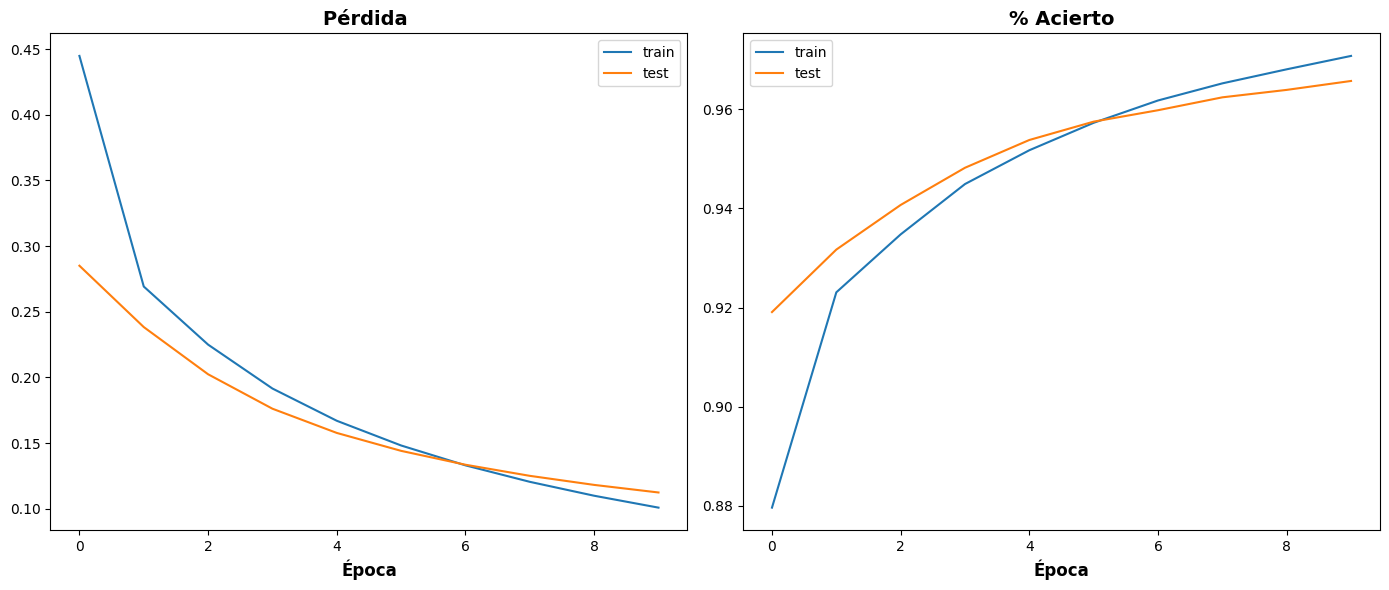

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_elu.history['loss'], label="train")
axs[0].plot(hist_sgd_elu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_elu.history['accuracy'], label="train")
axs[1].plot(hist_sgd_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


#CONCLUSIONES RELU VS ELU

In [104]:
relu_vs_elu = {
    'M√©trica': list(hist_sgd_relu.history.keys()),
    'hist_relu': [hist_sgd_relu.history[k][-1] for k in hist_sgd_relu.history],
    'hist_elu': [hist_sgd_elu.history[k][-1] for k in hist_sgd_elu.history]
}


df = pd.DataFrame(relu_vs_elu)

display(df)

M√©trica  hist_relu  hist_elu
0       accuracy   0.982933  0.970750
1           loss   0.063294  0.100788
2      precision   0.986491  0.976263
3         recall   0.979767  0.965850
4   val_accuracy   0.972600  0.965700
5       val_loss   0.090494  0.112328
6  val_precision   0.976231  0.970425
7     val_recall   0.969300  0.961400

ReLU mostr√≥ una alta precisi√≥n en entrenamiento (0.9983) y una buena generalizaci√≥n en validaci√≥n (0.9766), con una r√°pida convergencia (loss bajo). Sin embargo, existe el riesgo de "neuronas muertas", lo que puede afectar el aprendizaje en redes m√°s profundas o con pesos mal inicializados.

ELU, en cambio, obtuvo resultados algo inferiores en ambas m√©tricas (accuracy de 0.9705 en entrenamiento y 0.9643 en validaci√≥n), con un mayor valor de p√©rdida, lo que indica una convergencia m√°s lenta o menos eficiente. No obstante, su capacidad de producir salidas negativas ayuda a evitar el problema de las neuronas muertas, lo cual puede ser beneficioso en ciertos contextos o arquitecturas.

En resumen, ReLU se comport√≥ mejor en este caso espec√≠fico, pero ELU podr√≠a ofrecer ventajas en modelos m√°s complejos o con problemas de desactivaci√≥n de neuronas.

Ya que nuestro set de dato es simple nos eligirimos la funcion ReLU como funcion activadora para los siguientes cambios.

## Cambio batch size

### Batch size de 64

In [105]:
red_sgd_batch64 = keras.Sequential(name="red_sgd_bs64")
red_sgd_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_batch64.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_sgd_batch64.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_sgd_batch64.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_sgd_batch64.add(keras.layers.Dense(C, activation='softmax', name='capa_salida'))

red_sgd_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_sgd_batch64 = red_sgd_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))
red_sgd_batch64.save("red_sgd_batch64.keras")

Epoch 1/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 9ms/step - accuracy: 0.6525 - loss: 1.3271 - precision: 0.8695 - recall: 0.3159 - val_accuracy: 0.9044 - val_loss: 0.3421 - val_precision: 0.9386 - val_recall: 0.8693
Epoch 2/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 9ms/step - accuracy: 0.9091 - loss: 0.3255 - precision: 0.9407 - recall: 0.8764 - val_accuracy: 0.9263 - val_loss: 0.2577 - val_precision: 0.9469 - val_recall: 0.9063
Epoch 3/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 8ms/step - accuracy: 0.9273 - loss: 0.2537 - precision: 0.9474 - recall: 0.9077 - val_accuracy: 0.9370 - val_loss: 0.2185 - val_precision: 0.9528 - val_recall: 0.9229
Epoch 4/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 8ms/step - accuracy: 0.9386 - loss: 0.2149 - precision: 0.9543 - recall: 0.9222 - val_accuracy: 0.9451 - val_loss: 0.1923 - val_precision: 0.9574 - val_recall: 0.93

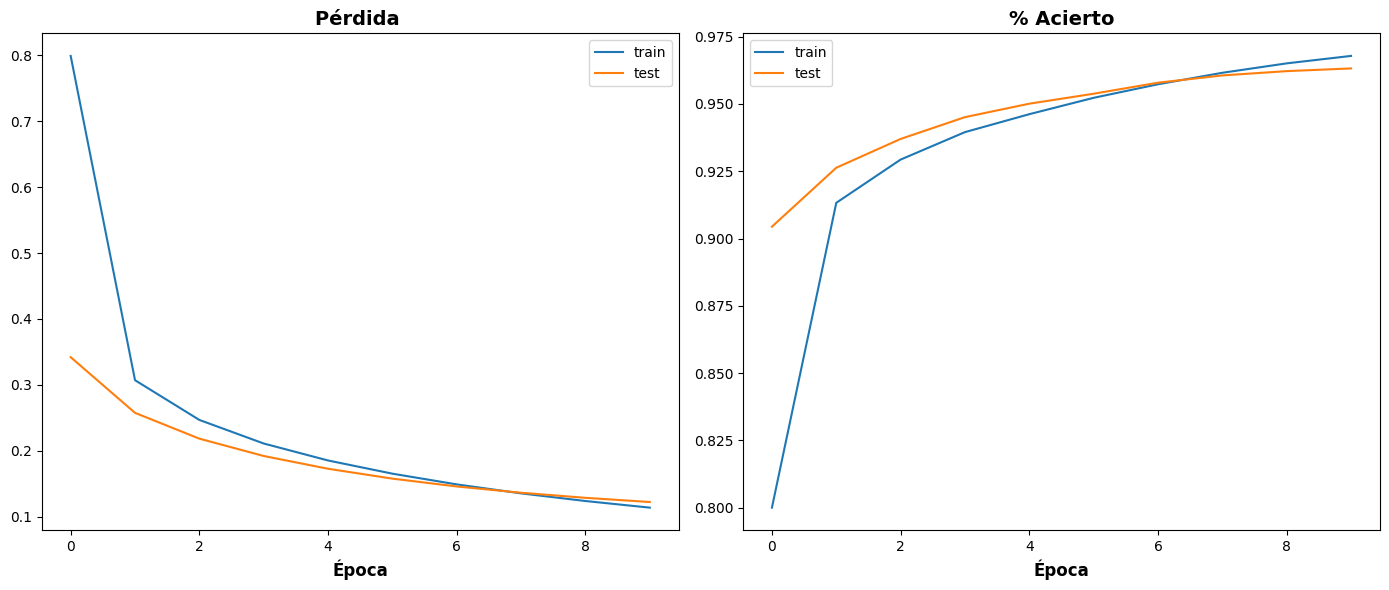

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_batch64.history['loss'], label="train")
axs[0].plot(hist_sgd_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_batch64.history['accuracy'], label="train")
axs[1].plot(hist_sgd_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### Batch size de 256

In [107]:
red_sgd_batch256 = keras.Sequential(name="red_sgd_bs264")
red_sgd_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_batch256.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_sgd_batch256.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_sgd_batch256.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_sgd_batch256.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_sgd_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_sgd_batch256 = red_sgd_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))
red_sgd_batch256.save("red_sgd_batch256.keras")

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 20ms/step - accuracy: 0.4408 - loss: 1.9564 - precision: 0.6656 - recall: 0.0274 - val_accuracy: 0.8187 - val_loss: 0.8462 - val_precision: 0.9747 - val_recall: 0.5017
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 23ms/step - accuracy: 0.8303 - loss: 0.7304 - precision: 0.9623 - recall: 0.6033 - val_accuracy: 0.8775 - val_loss: 0.4781 - val_precision: 0.9444 - val_recall: 0.7962
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 19ms/step - accuracy: 0.8769 - loss: 0.4634 - precision: 0.9435 - recall: 0.8025 - val_accuracy: 0.8954 - val_loss: 0.3798 - val_precision: 0.9388 - val_recall: 0.8522
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 22ms/step - accuracy: 0.8955 - loss: 0.3799 - precision: 0.9386 - recall: 0.8487 - val_accuracy: 0.9064 - val_loss: 0.3331 - val_precision: 0.9393 - val_recall: 0.8

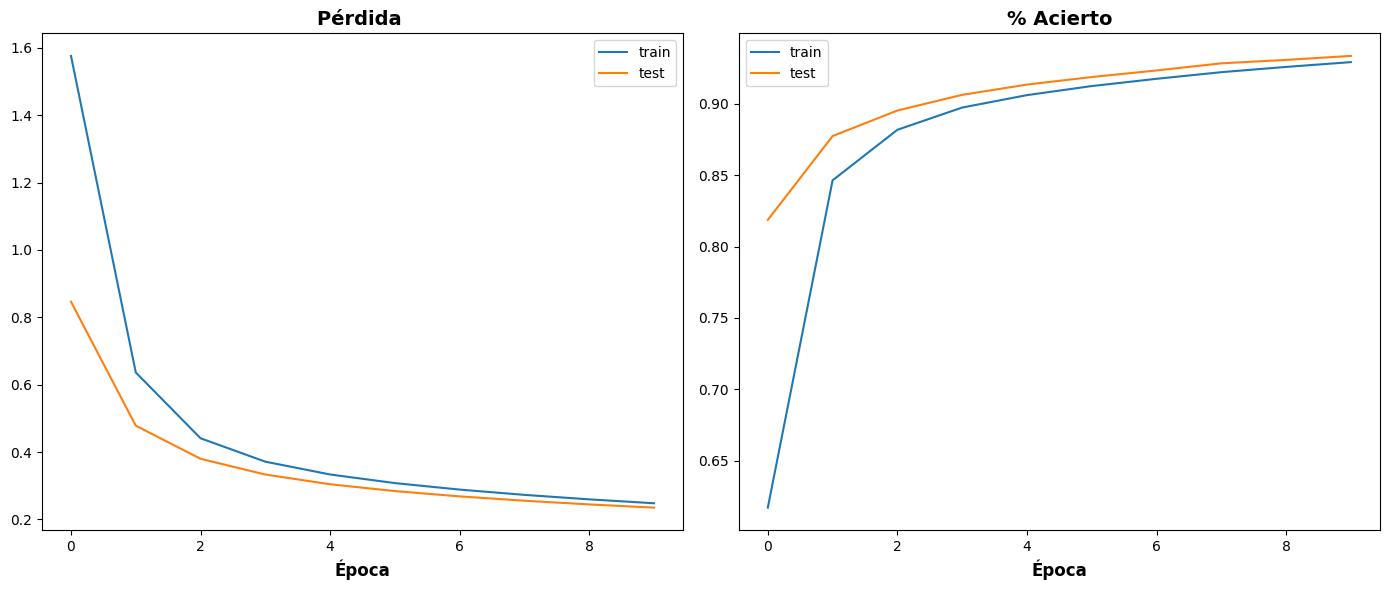

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_batch256.history['loss'], label="train")
axs[0].plot(hist_sgd_batch256.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_batch256.history['accuracy'], label="train")
axs[1].plot(hist_sgd_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [109]:
Batch_size_vs = {
    'M√©trica': list(hist_sgd_relu.history.keys()),
    'batch size = 32': [hist_sgd_relu.history[k][-1] for k in hist_sgd_relu.history],
    'batch size = 64': [hist_sgd_batch64.history[k][-1] for k in hist_sgd_batch64.history],
    'batch size = 256': [hist_sgd_batch256.history[k][-1] for k in hist_sgd_batch256.history],
}

df_batch = pd.DataFrame(Batch_size_vs)

display(df_batch)

M√©trica  batch size = 32  batch size = 64  batch size = 256
0       accuracy         0.982933         0.967850          0.929350
1           loss         0.063294         0.113942          0.247794
2      precision         0.986491         0.974760          0.949709
3         recall         0.979767         0.960983          0.911167
4   val_accuracy         0.972600         0.963200          0.933700
5       val_loss         0.090494         0.122466          0.234806
6  val_precision         0.976231         0.970059          0.950974
7     val_recall         0.969300         0.959000          0.917500

El batch size m√°s peque√±o (32) produjo los mejores resultados tanto en entrenamiento como en validaci√≥n. Tiene la mayor accuracy y val_accuracy, y las menores loss y val_loss A medida que el batch size aumenta, el rendimiento empeora:

La precisi√≥n (accuracy y val_accuracy) disminuye.

La p√©rdida (loss y val_loss) aumenta notablemente.

Batch sizes peque√±os tienden a proporcionar un aprendizaje con mejores metricas (accuracy y perdida), ###al introducir m√°s ruido estoc√°stico que puede ayudar a salir de m√≠nimos locales.

En cambio, batch sizes grandes pueden hacer que el modelo converja m√°s r√°pido, pero a veces a soluciones menos √≥ptimas. Pero batch sizes grandes pueden reducir el sobreentrenamiento, y se ve reflejado en la diferencia de accuracy y su validacion Batch size 32	con una diferencia de 0.0218, batch size de 64 con un diferencia de 0.0042 y batch size de 256 con una diferencia de 0.0050.

En conclucion:

Batch size peque√±o (32): aprende muy bien, pero tambi√©n tiende a memorizar m√°s el entrenamiento con mayor riesgo de overfitting.

Batch size grande (256): aprende de forma m√°s "estable", menos overfitting, pero tambi√©n menor rendimiento o errores mas grandes

Ya que el sobre entrenmiento en nuestro caso no es tan grande nos quedaremos con un batch size de 32 ya que la perdida o el error es mucho mas bajo que los demas tama√±os.

## Cambio de epochs

In [110]:
red_sgd_epoca = keras.Sequential(name="red_sgd_epoca")
red_sgd_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_epoca.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_sgd_epoca.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_sgd_epoca.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_sgd_epoca.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_sgd_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()

hist_sgd_epoca = red_sgd_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))
red_sgd_epoca.save("red_sgd_epoca.keras")

Epoch 1/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.7307 - loss: 1.0021 - precision: 0.9091 - recall: 0.4891 - val_accuracy: 0.9217 - val_loss: 0.2778 - val_precision: 0.9418 - val_recall: 0.9024
Epoch 2/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 6ms/step - accuracy: 0.9239 - loss: 0.2631 - precision: 0.9453 - recall: 0.9054 - val_accuracy: 0.9402 - val_loss: 0.2064 - val_precision: 0.9533 - val_recall: 0.9273
Epoch 3/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 6ms/step - accuracy: 0.9420 - loss: 0.1990 - precision: 0.9563 - recall: 0.9296 - val_accuracy: 0.9506 - val_loss: 0.1672 - val_precision: 0.9616 - val_recall: 0.9412
Epoch 4/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 6ms/step - accuracy: 0.9535 - loss: 0.1607 - precision: 0.9635 - recall: 0.9436 - val_accuracy: 0.9591 - val_loss: 0.1421 - val_precision: 0.9666 - val_rec

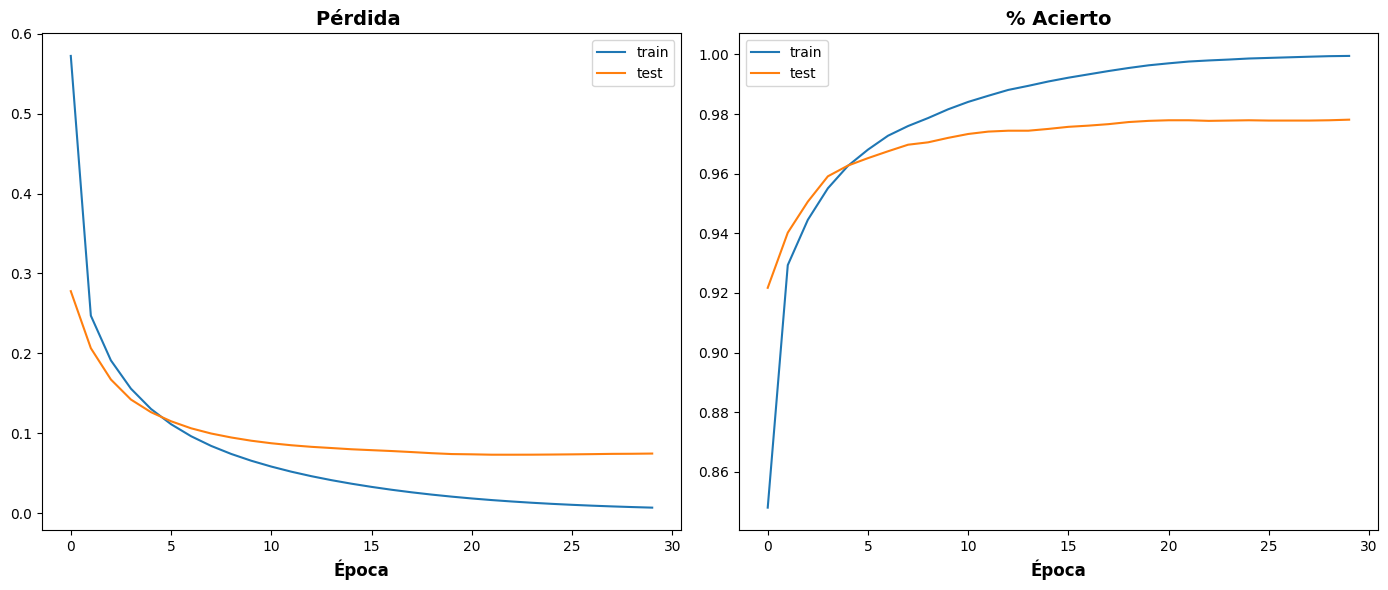

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_epoca.history['loss'], label="train")
axs[0].plot(hist_sgd_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_epoca.history['accuracy'], label="train")
axs[1].plot(hist_sgd_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [112]:
Epoca_vs = {
    'M√©trica': list(hist_sgd_relu.history.keys()),
    'Epoca = 10': [hist_sgd_relu.history[k][-1] for k in hist_sgd_relu.history],
    'Epoca = 30': [hist_sgd_epoca.history[k][-1] for k in hist_sgd_epoca.history],
    #'Epoca = 50': [.history[k][-1] for k in .history],
}

df_epoca = pd.DataFrame(Epoca_vs)

display(df_epoca)

M√©trica  Epoca = 10  Epoca = 30
0       accuracy    0.982933    0.999483
1           loss    0.063294    0.006788
2      precision    0.986491    0.999550
3         recall    0.979767    0.999367
4   val_accuracy    0.972600    0.978100
5       val_loss    0.090494    0.074499
6  val_precision    0.976231    0.979261
7     val_recall    0.969300    0.977400

Al aumentar las √©pocas de entrenamiento de 10 a 30, se observa una mejora general en todas las m√©tricas.

El modelo logra una mayor precisi√≥n tanto en entrenamiento como en validaci√≥n:

accuracy: sube ligeramente de 0.9984 ‚Üí 0.9996

val_accuracy: tambi√©n mejora, aunque de forma m√°s modesta (0.9766 ‚Üí 0.9787)

La p√©rdida (loss) disminuye en ambos conjuntos:

loss: se reduce casi a la mitad (0.0123 ‚Üí 0.0068)

val_loss: tambi√©n mejora, aunque de manera leve (0.0797 ‚Üí 0.0778)

¬°Buena pregunta! Aumentar la cantidad de √©pocas puede mejorar el rendimiento, pero tambi√©n tiene costos y riesgos que vale la pena considerar. Te los explico:

‚öñÔ∏è Costos de usar m√°s √©pocas
1. üïí Mayor tiempo de entrenamiento
Cada √©poca significa pasar una vez por todo el conjunto de datos, as√≠ que m√°s √©pocas = m√°s tiempo.

Esto puede ser costoso si:

El dataset es grande

Est√°s probando muchas configuraciones

Usas hardware limitado

2. üß† Riesgo de sobreentrenamiento (overfitting)
A partir de cierto punto, el modelo memoriza el conjunto de entrenamiento en vez de aprender a generalizar.

Esto se nota cuando:

accuracy sigue subiendo

pero val_accuracy se estanca o baja

y val_loss comienza a subir

En tu tabla, no se ve sobreentrenamiento a√∫n, pero si entrenaras 100 √©pocas podr√≠as empezar a verlo.

3. üí∞ Mayor consumo de recursos
M√°s uso de GPU/CPU

M√°s energ√≠a (si entrenas en cloud, m√°s costos)

Mayor desgaste de hardware si haces muchos ciclos largos

## Cambio de cantidad de capas

In [113]:
h4=64

red_sgd_capa4 = keras.Sequential(name="Red_sgd_4capas")
red_sgd_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_capa4.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_sgd_capa4.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_sgd_capa4.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_sgd_capa4.add(keras.layers.Dense(h4, activation='relu',name='cuarta_capa'))
red_sgd_capa4.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_sgd_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()

hist_sgd_capa4 = red_sgd_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_capa4.save("red_sgd_capa4.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 7ms/step - accuracy: 0.7147 - loss: 1.0147 - precision: 0.8831 - recall: 0.4958 - val_accuracy: 0.9245 - val_loss: 0.2553 - val_precision: 0.9433 - val_recall: 0.9094
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 7ms/step - accuracy: 0.9304 - loss: 0.2352 - precision: 0.9482 - recall: 0.9161 - val_accuracy: 0.9460 - val_loss: 0.1793 - val_precision: 0.9571 - val_recall: 0.9376
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9507 - loss: 0.1701 - precision: 0.9621 - recall: 0.9405 - val_accuracy: 0.9578 - val_loss: 0.1431 - val_precision: 0.9656 - val_recall: 0.9506
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9621 - loss: 0.1334 - precision: 0.9692 - recall: 0.9544 - val_accuracy: 0.9639 - val_loss: 0.1236 - val_precision: 0.9697 - val_rec

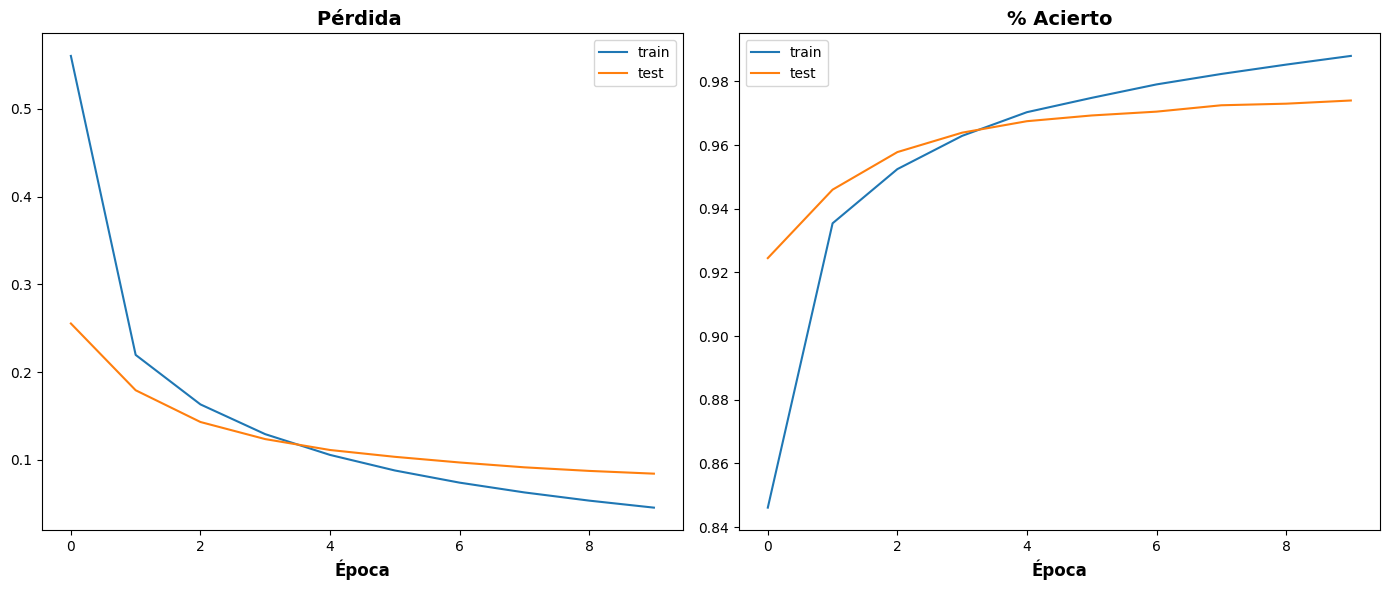

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_capa4.history['loss'], label="train")
axs[0].plot(hist_sgd_capa4.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_capa4.history['accuracy'], label="train")
axs[1].plot(hist_sgd_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [115]:
Capas_vs = {
    'M√©trica': list(hist_sgd_relu.history.keys()),
    'Capas = 3': [hist_sgd_relu.history[k][-1] for k in hist_sgd_relu.history],
    'Capas = 4': [hist_sgd_capa4.history[k][-1] for k in hist_sgd_capa4.history]
}

df_capas = pd.DataFrame(Capas_vs)

display(df_capas)

M√©trica  Capas = 3  Capas = 4
0       accuracy   0.982933   0.988000
1           loss   0.063294   0.045536
2      precision   0.986491   0.990094
3         recall   0.979767   0.986117
4   val_accuracy   0.972600   0.974000
5       val_loss   0.090494   0.084251
6  val_precision   0.976231   0.977085
7     val_recall   0.969300   0.972200

## Agregaci√≥n de regulaci√≥n (drop-out)

In [116]:
red_sgd_dropout = keras.Sequential(name="red_sgd_dropout")
red_sgd_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_sgd_dropout.add(keras.layers.Dropout(0.3))
red_sgd_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_sgd_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_sgd_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_sgd_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_sgd_dropout = red_sgd_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_sgd_dropout.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 7ms/step - accuracy: 0.6890 - loss: 1.0738 - precision: 0.8688 - recall: 0.4565 - val_accuracy: 0.9203 - val_loss: 0.2675 - val_precision: 0.9415 - val_recall: 0.9009
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.9122 - loss: 0.2945 - precision: 0.9358 - recall: 0.8893 - val_accuracy: 0.9426 - val_loss: 0.1930 - val_precision: 0.9559 - val_recall: 0.9304
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9355 - loss: 0.2196 - precision: 0.9517 - recall: 0.9199 - val_accuracy: 0.9541 - val_loss: 0.1550 - val_precision: 0.9636 - val_recall: 0.9455
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.9477 - loss: 0.1778 - precision: 0.9599 - recall: 0.9359 - val_accuracy: 0.9592 - val_loss: 0.1328 - val_precision: 0.9673 - val_rec

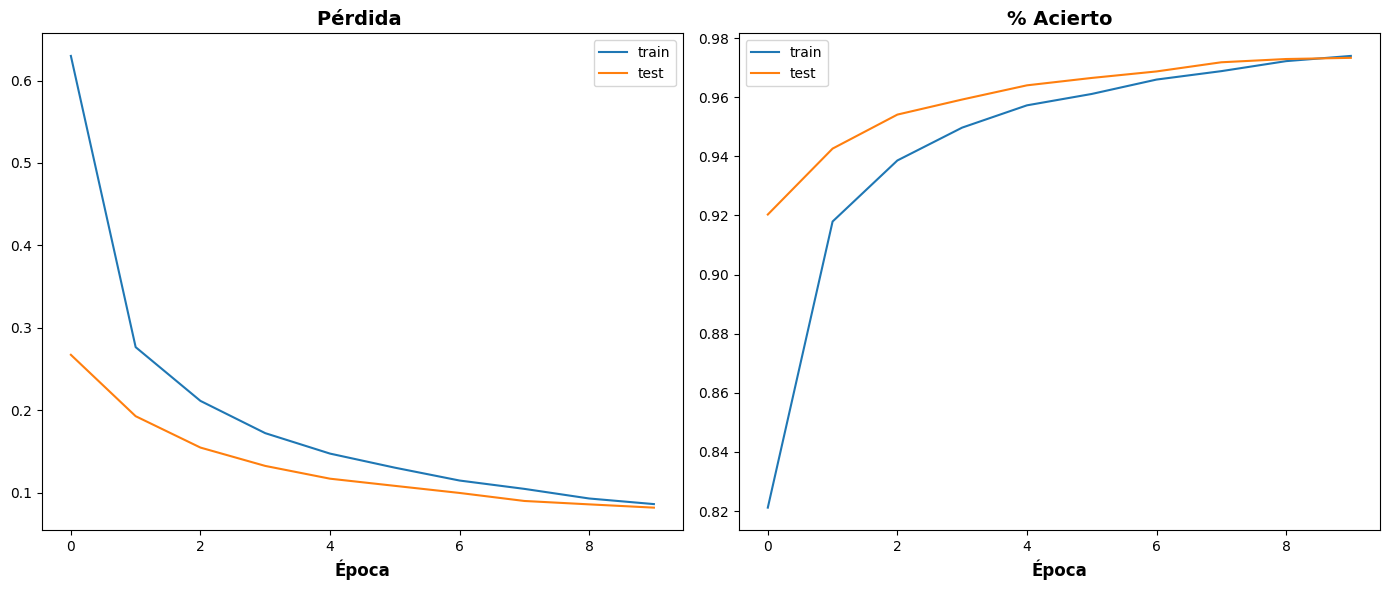

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_sgd_dropout.history['loss'], label="train")
axs[0].plot(hist_sgd_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_sgd_dropout.history['accuracy'], label="train")
axs[1].plot(hist_sgd_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [118]:
Dropout_vs = {
    'M√©trica': list(hist_sgd_relu.history.keys()),
    'Sin DropOut': [hist_sgd_relu.history[k][-1] for k in hist_sgd_relu.history],
    'Con DropOut': [hist_sgd_dropout.history[k][-1] for k in hist_sgd_dropout.history]
}

df_dropout = pd.DataFrame(Dropout_vs)

display(df_dropout)

M√©trica  Sin DropOut  Con DropOut
0       accuracy     0.982933     0.973950
1           loss     0.063294     0.086500
2      precision     0.986491     0.978770
3         recall     0.979767     0.969683
4   val_accuracy     0.972600     0.973300
5       val_loss     0.090494     0.082206
6  val_precision     0.976231     0.976957
7     val_recall     0.969300     0.970900

## Mejor modelo

Para la selecion del mejor modelo utilizaremos la metrica

In [119]:
# Lista de modelos y sus historiales
modelos = [red_sgd_relu, red_sgd_elu, red_sgd_batch64, red_sgd_batch256, red_sgd_epoca, red_sgd_capa4, red_sgd_dropout]
historiales = [hist_sgd_relu, hist_sgd_elu, hist_sgd_batch64, hist_sgd_batch256, hist_sgd_epoca, hist_sgd_capa4, hist_sgd_dropout]

# Calcular diferencias absolutas entre accuracy y val_accuracy
diferencias_acc = [abs(h.history['accuracy'][-1] - h.history['val_accuracy'][-1]) for h in historiales]

# Encontrar el √≠ndice del modelo con menor diferencia
indice_mejor = diferencias_acc.index(min(diferencias_acc))

# Obtener el mejor modelo y sus m√©tricas
mejor_modelo = modelos[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales[indice_mejor]

# Extraer m√©tricas
acc = hist_mejor.history['accuracy'][-1]
val_acc = hist_mejor.history['val_accuracy'][-1]
loss = hist_mejor.history['loss'][-1]
val_loss = hist_mejor.history['val_loss'][-1]
recall = hist_mejor.history['recall'][-1]
precision = hist_mejor.history['precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall)


# Mostrar resultados
print(f"Mejor modelo seg√∫n menor diferencia entre Accuracy y Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Diferencia acc: {abs(acc - val_acc):.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")

# Guardar el mejor modelo
mejor_modelo.save("modelo_mas_equilibrado.keras")


Mejor modelo seg√∫n menor diferencia entre Accuracy y Val Accuracy:
Modelo:         red_sgd_dropout
Accuracy:       0.9740
Val Accuracy:   0.9733
Diferencia acc: 0.0007
Loss:           0.0865
Val Loss:       0.0822
Recall:         0.9697
Precision:      0.9788
F1 Score:       0.9742


# Experimento 2: Optimizador Adam

## Activadores (Relu y Elu)

### Relu

In [120]:
red_adam_relu = keras.Sequential(name="red_adam_relu")
red_adam_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_adam_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_adam_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_adam_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_relu.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_adam_relu = red_adam_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_relu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 10ms/step - accuracy: 0.8985 - loss: 0.3305 - precision: 0.9400 - recall: 0.8645 - val_accuracy: 0.9545 - val_loss: 0.1438 - val_precision: 0.9617 - val_recall: 0.9504
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 10ms/step - accuracy: 0.9712 - loss: 0.0954 - precision: 0.9755 - recall: 0.9676 - val_accuracy: 0.9571 - val_loss: 0.1482 - val_precision: 0.9610 - val_recall: 0.9533
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 9ms/step - accuracy: 0.9800 - loss: 0.0645 - precision: 0.9829 - recall: 0.9781 - val_accuracy: 0.9664 - val_loss: 0.1278 - val_precision: 0.9685 - val_recall: 0.9640
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 9ms/step - accuracy: 0.9849 - loss: 0.0476 - precision: 0.9869 - recall: 0.9836 - val_accuracy: 0.9747 - val_loss: 0.0979 - val_precision: 0.9769 - val_r

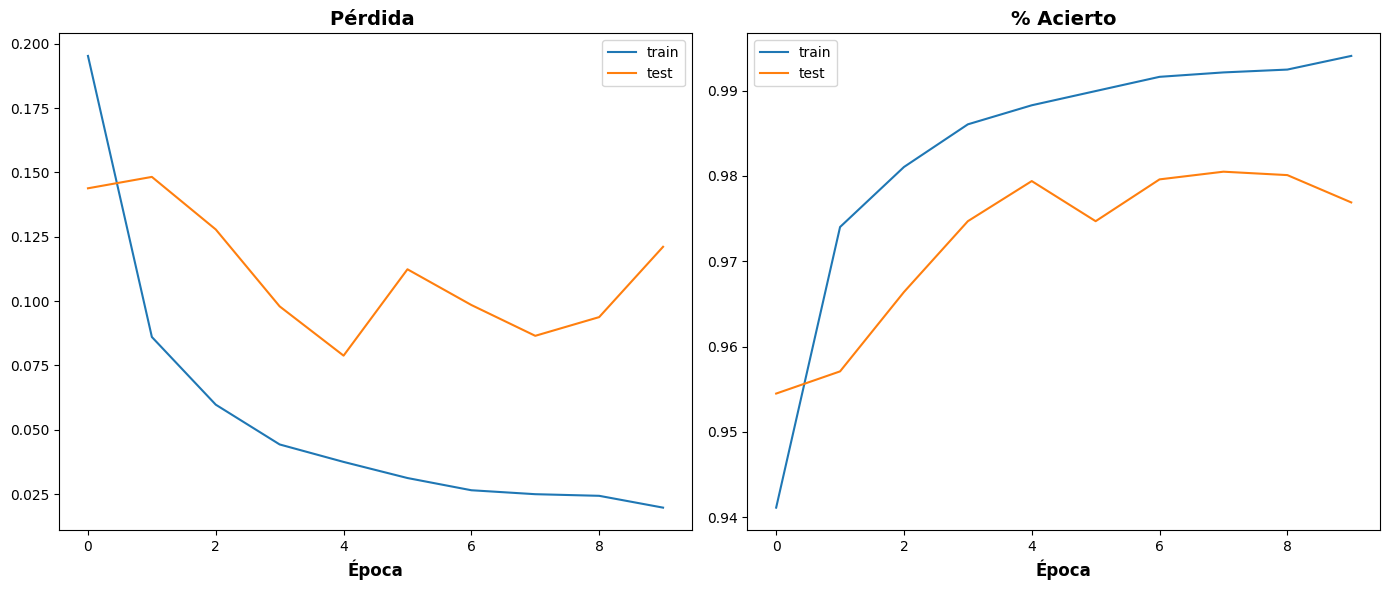

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs.set_title('Activadores (Relu y Elu)', fontsize=14, fontweight="bold")

axs[0].plot(hist_adam_relu.history['loss'], label="train")
axs[0].plot(hist_adam_relu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_relu.history['accuracy'], label="train")
axs[1].plot(hist_adam_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()


# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### ELU

In [122]:
red_adam_elu = keras.Sequential(name="red_adam_elu")
red_adam_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_elu.add(keras.layers.Dense(h1, activation='elu',name='primera_capa'))
red_adam_elu.add(keras.layers.Dense(h2, activation='elu',name='segunda_capa'))
red_adam_elu.add(keras.layers.Dense(h3, activation='elu',name='tercera_capa'))
red_adam_elu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_elu.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
   metrics=['accuracy','precision','recall']
)
start_time = time()
hist_adam_elu = red_adam_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_elu.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 10ms/step - accuracy: 0.8951 - loss: 0.3420 - precision: 0.9244 - recall: 0.8723 - val_accuracy: 0.9562 - val_loss: 0.1509 - val_precision: 0.9634 - val_recall: 0.9496
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 10ms/step - accuracy: 0.9617 - loss: 0.1221 - precision: 0.9663 - recall: 0.9583 - val_accuracy: 0.9568 - val_loss: 0.1476 - val_precision: 0.9626 - val_recall: 0.9525
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 9ms/step - accuracy: 0.9722 - loss: 0.0873 - precision: 0.9754 - recall: 0.9699 - val_accuracy: 0.9651 - val_loss: 0.1192 - val_precision: 0.9681 - val_recall: 0.9624
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 10ms/step - accuracy: 0.9778 - loss: 0.0714 - precision: 0.9801 - recall: 0.9760 - val_accuracy: 0.9672 - val_loss: 0.1138 - val_precision: 0.9702 - val_

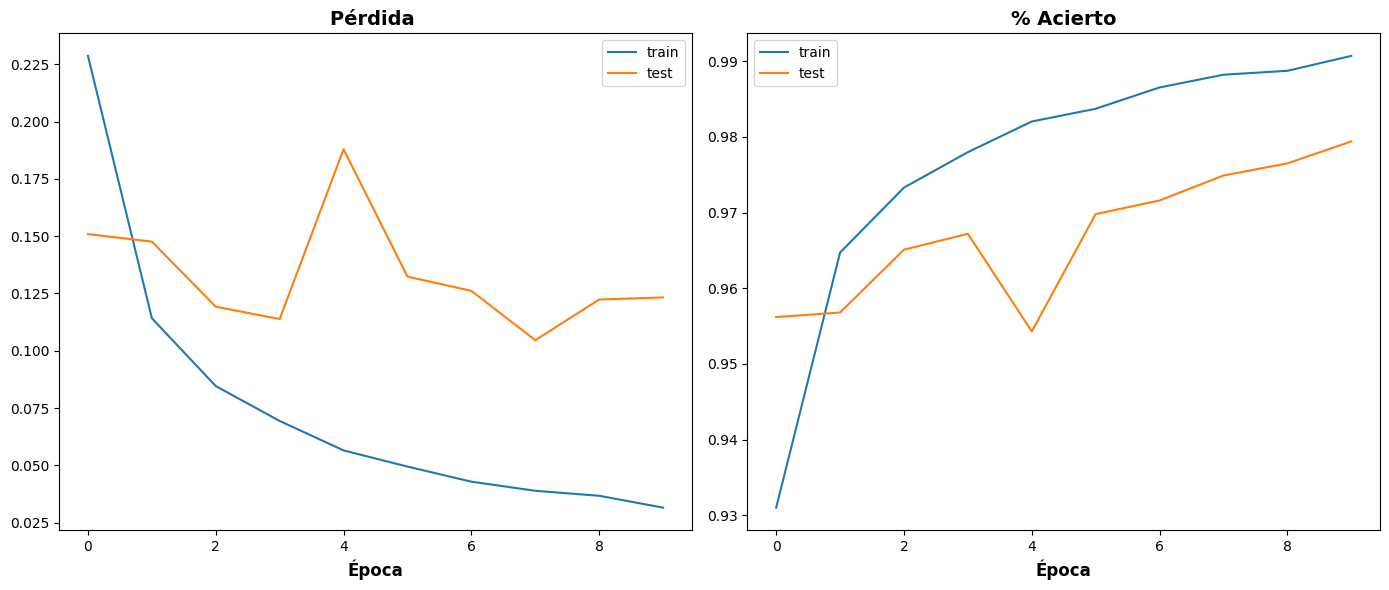

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_elu.history['loss'], label="train")
axs[0].plot(hist_adam_elu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_elu.history['accuracy'], label="train")
axs[1].plot(hist_adam_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


## Cambio Batch size

### Batch size de 64

In [124]:
red_adam_batch64 = keras.Sequential(name="red_adam_bs64")
red_adam_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch64.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_adam_batch64.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_adam_batch64.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_adam_batch64.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_adam_batch64 = red_adam_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_batch64.keras")

Epoch 1/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 11ms/step - accuracy: 0.8890 - loss: 0.3682 - precision: 0.9372 - recall: 0.8446 - val_accuracy: 0.9509 - val_loss: 0.1502 - val_precision: 0.9576 - val_recall: 0.9461
Epoch 2/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 12ms/step - accuracy: 0.9712 - loss: 0.0931 - precision: 0.9759 - recall: 0.9677 - val_accuracy: 0.9723 - val_loss: 0.0894 - val_precision: 0.9753 - val_recall: 0.9695
Epoch 3/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 12ms/step - accuracy: 0.9811 - loss: 0.0596 - precision: 0.9835 - recall: 0.9790 - val_accuracy: 0.9715 - val_loss: 0.1037 - val_precision: 0.9745 - val_recall: 0.9688
Epoch 4/10
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 12ms/step - accuracy: 0.9866 - loss: 0.0424 - precision: 0.9878 - recall: 0.9851 - val_accuracy: 0.9737 - val_loss: 0.0990 - val_precision: 0.9757 - val_recall:

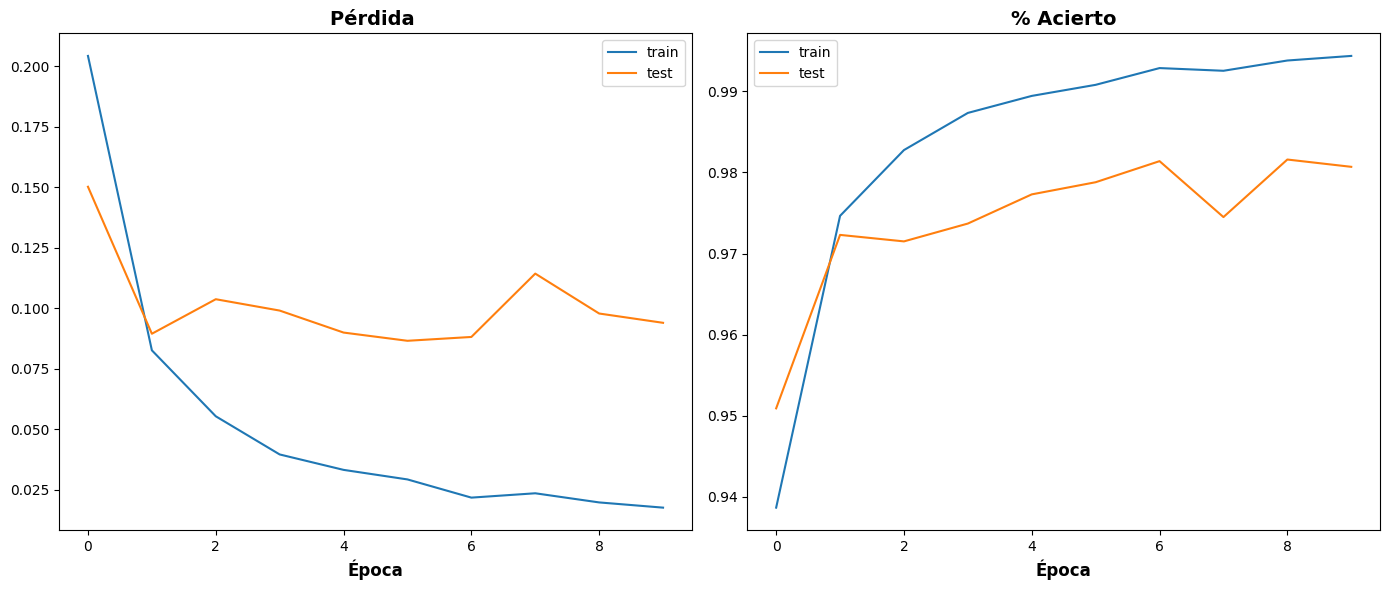

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch64.history['loss'], label="train")
axs[0].plot(hist_adam_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch64.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

### Batch Size 256

In [126]:
red_adam_batch256 = keras.Sequential(name="red_adam_bs32")
red_adam_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch256.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_adam_batch256.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_adam_batch256.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_adam_batch256.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_adam_batch256 = red_adam_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_batch256.keras")

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 29ms/step - accuracy: 0.8492 - loss: 0.5361 - precision: 0.9222 - recall: 0.7566 - val_accuracy: 0.9595 - val_loss: 0.1290 - val_precision: 0.9672 - val_recall: 0.9543
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 21ms/step - accuracy: 0.9684 - loss: 0.1044 - precision: 0.9739 - recall: 0.9636 - val_accuracy: 0.9714 - val_loss: 0.0873 - val_precision: 0.9752 - val_recall: 0.9697
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 26ms/step - accuracy: 0.9812 - loss: 0.0627 - precision: 0.9847 - recall: 0.9787 - val_accuracy: 0.9755 - val_loss: 0.0803 - val_precision: 0.9781 - val_recall: 0.9733
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 21ms/step - accuracy: 0.9871 - loss: 0.0419 - precision: 0.9891 - recall: 0.9854 - val_accuracy: 0.9745 - val_loss: 0.0855 - val_precision: 0.9764 - val_recall: 0.9

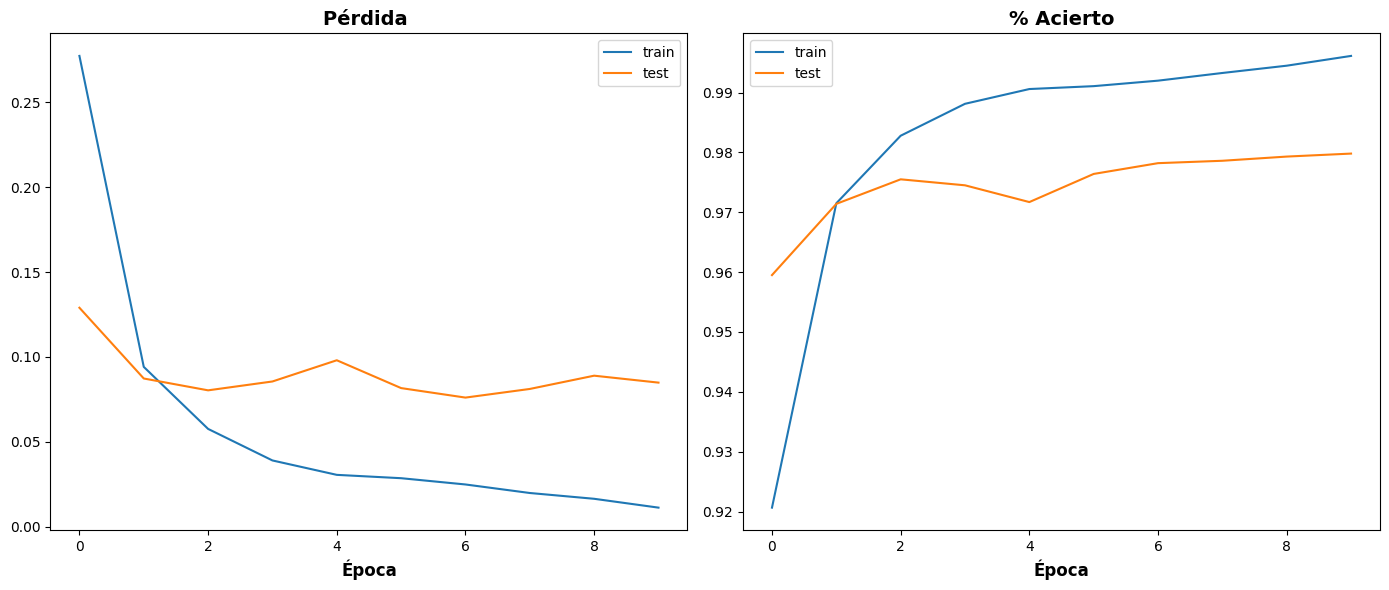

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch256.history['loss'], label="train")
axs[0].plot(hist_adam_batch256.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acier256
axs[1].plot(hist_adam_batch256.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()



## Cambio de epocas

In [128]:
red_adam_epoca = keras.Sequential(name="red_adam_epoca")
red_adam_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_epoca.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_adam_epoca.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_adam_epoca.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_adam_epoca.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()

hist_adam_epoca = red_adam_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_epoca.keras")

Epoch 1/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 10ms/step - accuracy: 0.9007 - loss: 0.3270 - precision: 0.9390 - recall: 0.8667 - val_accuracy: 0.9606 - val_loss: 0.1241 - val_precision: 0.9677 - val_recall: 0.9551
Epoch 2/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 10ms/step - accuracy: 0.9708 - loss: 0.0942 - precision: 0.9748 - recall: 0.9675 - val_accuracy: 0.9642 - val_loss: 0.1248 - val_precision: 0.9677 - val_recall: 0.9602
Epoch 3/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 10ms/step - accuracy: 0.9797 - loss: 0.0643 - precision: 0.9822 - recall: 0.9776 - val_accuracy: 0.9711 - val_loss: 0.1026 - val_precision: 0.9740 - val_recall: 0.9690
Epoch 4/30
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 9ms/step - accuracy: 0.9851 - loss: 0.0467 - precision: 0.9871 - recall: 0.9832 - val_accuracy: 0.9739 - val_loss: 0.0969 - val_precision: 0.9762 - val_

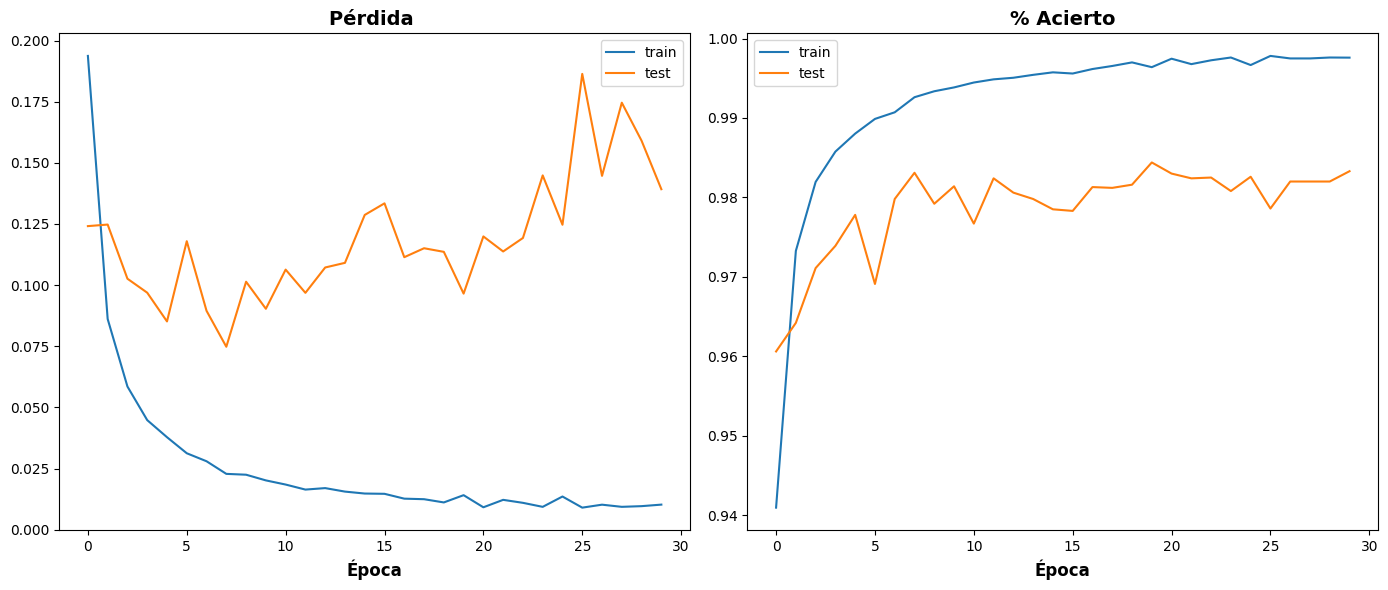

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_epoca.history['loss'], label="train")
axs[0].plot(hist_adam_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_epoca.history['accuracy'], label="train")
axs[1].plot(hist_adam_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Cambio cantidad de capas

In [130]:
h4=64

red_adam_capa4 = keras.Sequential(name="Red_adam_4capas")
red_adam_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_capa4.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_adam_capa4.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_adam_capa4.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_adam_capa4.add(keras.layers.Dense(h4, activation='relu',name='cuarta_capa'))
red_adam_capa4.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_adam_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()

hist_adam_capa4 = red_adam_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))
red_adam_capa4.save("red_sgd_capa4.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 11ms/step - accuracy: 0.8915 - loss: 0.3490 - precision: 0.9342 - recall: 0.8562 - val_accuracy: 0.9552 - val_loss: 0.1357 - val_precision: 0.9621 - val_recall: 0.9507
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 10ms/step - accuracy: 0.9699 - loss: 0.1023 - precision: 0.9746 - recall: 0.9649 - val_accuracy: 0.9697 - val_loss: 0.1021 - val_precision: 0.9743 - val_recall: 0.9673
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 10ms/step - accuracy: 0.9793 - loss: 0.0684 - precision: 0.9822 - recall: 0.9764 - val_accuracy: 0.9732 - val_loss: 0.1005 - val_precision: 0.9763 - val_recall: 0.9710
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 11ms/step - accuracy: 0.9844 - loss: 0.0529 - precision: 0.9869 - recall: 0.9823 - val_accuracy: 0.9722 - val_loss: 0.1021 - val_precision: 0.9763 - val

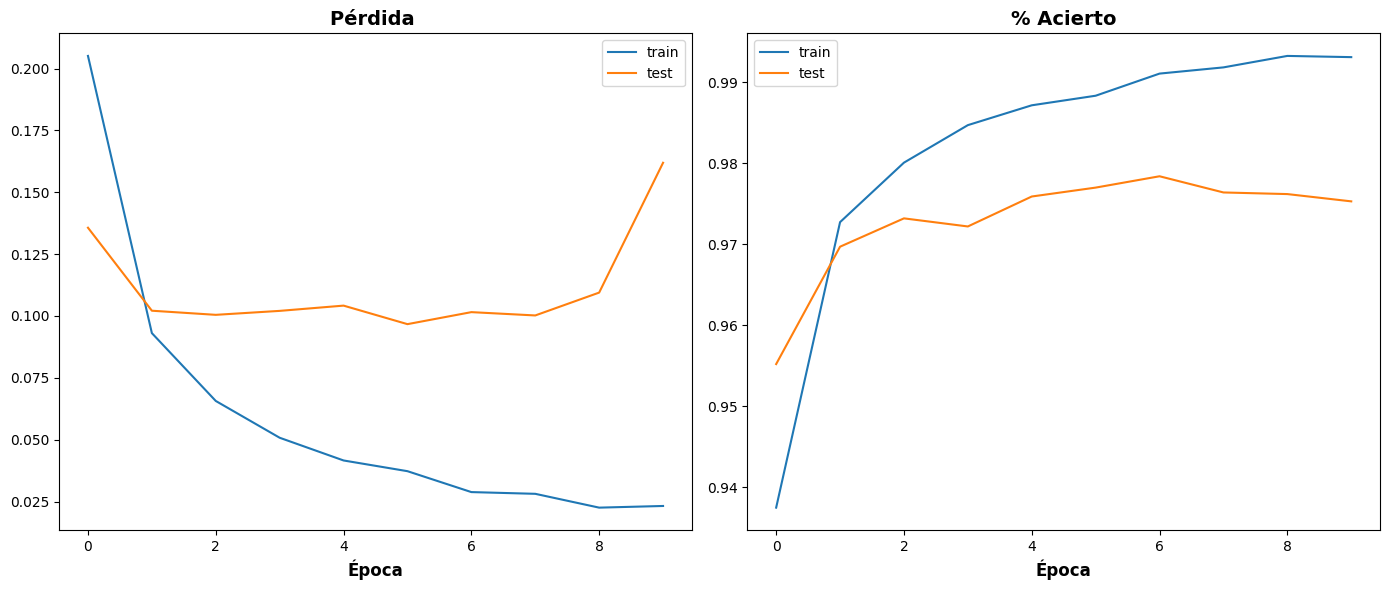

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_capa4.history['loss'], label="train")
axs[0].plot(hist_adam_capa4.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_capa4.history['accuracy'], label="train")
axs[1].plot(hist_adam_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Agregaci√≥n de regulaci√≥n (drop-out)

In [132]:
red_adam_dropout= keras.Sequential(name="red_adam_dropout")
red_adam_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_adam_dropout.add(keras.layers.Dropout(0.3))
red_adam_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_adam_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','precision','recall']
)
start_time = time()
hist_adam_dropout = red_adam_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

end_time = time()
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_sgd_relu.save("red_adam_dropout.keras")

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 11ms/step - accuracy: 0.8841 - loss: 0.3792 - precision: 0.9278 - recall: 0.8426 - val_accuracy: 0.9639 - val_loss: 0.1169 - val_precision: 0.9708 - val_recall: 0.9578
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 10ms/step - accuracy: 0.9619 - loss: 0.1249 - precision: 0.9688 - recall: 0.9566 - val_accuracy: 0.9701 - val_loss: 0.0935 - val_precision: 0.9740 - val_recall: 0.9669
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 10ms/step - accuracy: 0.9696 - loss: 0.1007 - precision: 0.9744 - recall: 0.9657 - val_accuracy: 0.9747 - val_loss: 0.0859 - val_precision: 0.9783 - val_recall: 0.9720
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 10ms/step - accuracy: 0.9755 - loss: 0.0805 - precision: 0.9788 - recall: 0.9721 - val_accuracy: 0.9735 - val_loss: 0.0882 - val_precision: 0.9755 - val

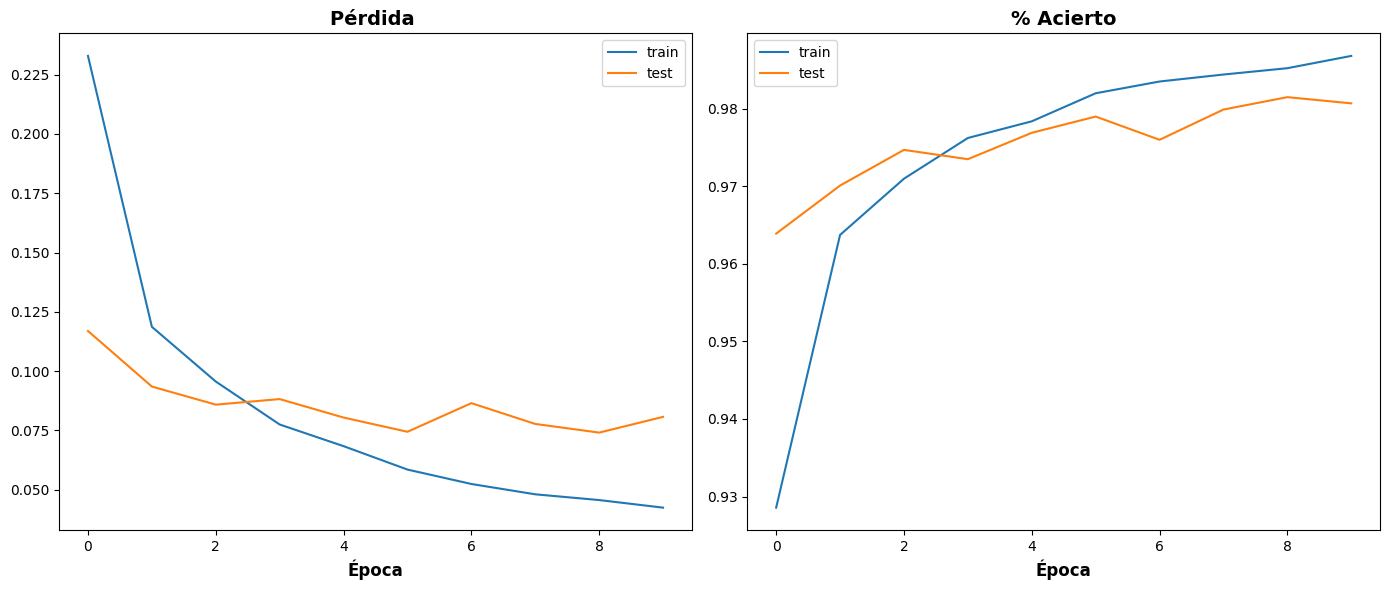

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_dropout.history['loss'], label="train")
axs[0].plot(hist_adam_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_dropout.history['accuracy'], label="train")
axs[1].plot(hist_adam_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Mejor modelo

In [134]:
# Lista de modelos y sus historiales
modelos_adam = [red_adam_relu, red_adam_elu, red_adam_batch64, red_adam_batch256, red_adam_epoca, red_adam_capa4, red_adam_dropout]
historiales_adam = [hist_adam_relu, hist_adam_elu, hist_adam_batch64, hist_adam_batch256, hist_adam_epoca, hist_adam_capa4, hist_adam_dropout]
# Calcular diferencias absolutas entre accuracy y val_accuracy
diferencias_acc = [abs(h.history['accuracy'][-1] - h.history['val_accuracy'][-1]) for h in historiales_adam]

# Encontrar el √≠ndice del modelo con menor diferencia
indice_mejor = diferencias_acc.index(min(diferencias_acc))

# Obtener el mejor modelo y sus m√©tricas
mejor_modelo = modelos_adam[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales_adam[indice_mejor]

# Extraer m√©tricas
acc = hist_mejor.history['accuracy'][-1]
val_acc = hist_mejor.history['val_accuracy'][-1]
loss = hist_mejor.history['loss'][-1]
val_loss = hist_mejor.history['val_loss'][-1]
recall = hist_mejor.history['recall'][-1]
precision = hist_mejor.history['precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall)


# Mostrar resultados
print(f"Mejor modelo seg√∫n menor diferencia entre Accuracy y Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Diferencia acc: {abs(acc - val_acc):.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")

# Guardar el mejor modelo
mejor_modelo.save("modelo_mas_equilibrado.keras")

Mejor modelo seg√∫n menor diferencia entre Accuracy y Val Accuracy:
Modelo:         red_adam_dropout
Accuracy:       0.9868
Val Accuracy:   0.9807
Diferencia acc: 0.0061
Loss:           0.0425
Val Loss:       0.0807
Recall:         0.9856
Precision:      0.9880
F1 Score:       0.9868
